In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
fraud_data=pd.read_csv("Fraud_check.csv")
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


<AxesSubplot:>

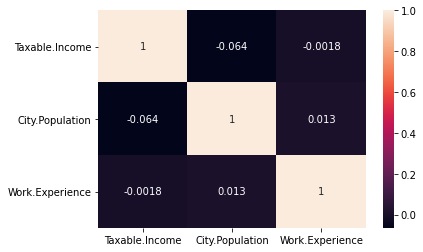

In [28]:
sns.heatmap(fraud_data.corr(),annot=True)

In [29]:
fraud_data["taxable_income"]="Risky"
fraud_data.loc[fraud_data["Taxable.Income"]>30000,"taxable_income"]="Good"

In [31]:
fraud_data.drop(["Taxable.Income"],inplace=True,axis=1)
fraud_data['taxable_income'].unique()
fraud_data.taxable_income.value_counts()

Good     476
Risky    124
Name: taxable_income, dtype: int64

In [32]:
fraud_data.isnull().sum()
fraud_data.dropna()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [33]:
fraud_data.columns
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   taxable_income   600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [34]:
#converting into binary
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fraud_data["Undergrad"]=lb.fit_transform(fraud_data["Undergrad"])
fraud_data["Marital.Status"]=lb.fit_transform(fraud_data["Marital.Status"])
fraud_data["Urban"]=lb.fit_transform(fraud_data["Urban"])
fraud_data["taxable_income"]=lb.fit_transform(fraud_data["taxable_income"])

In [ ]:
predictors = colnames[:5]
target = colnames[5]

In [57]:
predictors

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

In [56]:
target

'taxable_income'

In [52]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fraud_data, test_size = 0.3)

In [45]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')

In [46]:
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy')

In [47]:
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,112,35
1,26,7


In [48]:
np.mean(preds == test[target])

0.6611111111111111

In [49]:
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,0,1
Actual,,
0,329,0
1,0,91


In [50]:
np.mean(preds == train[target])

1.0